In [1]:
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
from scipy import stats
import sys

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import KFold

import keras
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, LeakyReLU, PReLU 
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras.regularizers import l2, l1

import crypto_utils as crypu
from eda_utils import *
from create_models import *
from model_utils import *


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\mathus07\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\mathus07\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data Aggregation

In [2]:
p = prepare_data("./data/file_info.csv")

In [3]:
p.describe()

,BTC,LTC,DCOILWTICO,DHHNGSP,GOLDPMGBD228NLBM,DTWEXB,DEXUSEU,DEXUSUK,DEXCHUS,T10YIE,...,OVXCLS,GVZCLS,VXNCLS,VXSLVCLS,VXGSCLS,EVZCLS,VXFXICLS,VXEWZCLS,NIKKEI225,y
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,...,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,1658.035568,23.946493,64.824106,3.213810,1249.656026,114.424164,1.194656,1.468091,6.407642,1.869650,...,33.058709,16.757504,16.644316,27.270762,24.534510,9.093064,25.040933,34.165148,17675.366547,0.545101
std,3139.561307,52.114526,24.161066,0.868724,77.053926,8.869233,0.108498,0.144147,0.269758,0.264096,...,12.559367,3.951246,3.861980,6.005372,4.729186,2.274558,6.335536,8.487505,2554.001352,0.498155
min,68.430000,1.160000,26.190000,1.490000,1049.400000,99.275500,1.037500,1.211800,6.040200,1.180000,...,14.500000,9.430000,10.310000,16.580000,16.160000,4.690000,15.090000,18.060000,12445.380000,0.000000
25%,279.497500,3.120000,46.760000,2.712500,1203.200000,103.021425,1.106275,1.321900,6.174350,1.642500,...,22.877500,13.890000,14.220000,22.092500,21.240000,7.482500,20.442500,28.565000,15455.305000,0.000000
50%,506.890000,3.940000,53.085000,2.990000,1255.950000,118.010450,1.146600,1.504400,6.340300,1.870000,...,30.240000,16.230000,15.560000,27.225000,23.780000,8.690000,24.245000,32.370000,17392.315000,1.000000
75%,931.925000,14.792500,93.855000,3.730000,1305.250000,121.414425,1.306675,1.572800,6.632700,2.120000,...,41.690000,19.270000,17.757500,31.267500,27.077500,10.390000,28.115000,37.575000,19645.365000,1.000000
max,19114.200000,358.340000,110.620000,8.150000,1469.250000,128.898500,1.392700,1.716500,6.958000,2.370000,...,78.970000,33.510000,42.950000,47.870000,50.840000,15.050000,58.400000,72.830000,24124.150000,1.000000


## Data Normalization

In [6]:
df_RV10 = data_normalization(p,'rolling_window',10)

In [8]:
#Split Data
(X_train,X_test,y_train,y_test) = split_data(df_RV_10,0.9)

In [10]:
resRV_10 = traditional_models(X_train, y_train, X_test, y_test)

In [11]:
resRV_10

,AUC,Accuracy
LogReg,0.513208,0.585938
KNN,0.478742,0.523438
LDA,0.536855,0.523438
QDA,0.627421,0.656250
RandomForest,0.551069,0.562500
ADABoost,0.470314,0.539062
SVM,0.494843,0.585938


In [30]:
k = pd.DataFrame()
for i in range(5,31,5):
    df = data_normalization(p,'rolling_window',i)
    (X_train,X_test,y_train,y_test) = split_data(df,0.9)
    x = traditional_models(X_train, y_train, X_test, y_test)
    c = 'wd_'+str(i)
    k[c] = x['AUC'].tolist()
    k.index = x.index
    
    

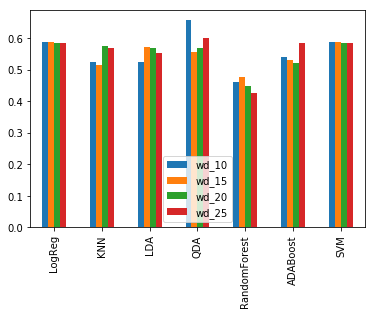

In [37]:
k.plot(kind='bar',x=k.index)

In [39]:
#Using Min-Max
df = data_normalization(p,'min-max')
(X_train,X_test,y_train,y_test) = split_data(df,0.9)
df_minmax = traditional_models(X_train, y_train, X_test, y_test)
df_minmax

,AUC,Accuracy
LogReg,0.436197,0.589147
KNN,0.450348,0.589147
LDA,0.615690,0.410853
QDA,0.601043,0.426357
RandomForest,0.462512,0.418605
ADABoost,0.544191,0.589147
SVM,0.629096,0.558140


In [45]:
#Using PCA
df = data_normalization(p,'min-max')
(X_train,X_test,y_train,y_test) = split_data(df,0.9)
pca = PCA(n_components=5)
X_train_pca = pca.fit(X_train).transform(X_train)
X_test_pca = pca.fit(X_test).transform(X_test)
res_pca = traditional_models(X_train_pca,y_train,X_test_pca,y_test)
res_pca

,AUC,Accuracy
LogReg,0.588381,0.589147
KNN,0.594464,0.573643
LDA,0.623138,0.612403
QDA,0.593347,0.550388
RandomForest,0.535129,0.527132
ADABoost,0.548411,0.511628
SVM,0.578203,0.565891


In [41]:
#Feedforward NN
df_RV10 = data_normalization(p,'rolling_window',10)
(X_train,X_test,y_train,y_test) = split_data(df_RV10,0.9)
train_set = X_train.as_matrix()
test_set = X_test.as_matrix()

In [42]:
##Feedforward Model
def make_model(num_nodes,num_layers,batch_size,epch,train_set,y_train,test_set,y_test):
    num_layers = num_layers-1
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=train_set.shape[1], activation='relu'))
    for i in range(num_layers):
        model.add(Dense(num_nodes, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(lr=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    p = model.fit(train_set, y_train,
              epochs=epch,
              batch_size=batch_size,
             validation_data=(test_set, y_test),verbose=False)
    return p

In [43]:

x = make_model(50,3,32,250,train_set,y_train,test_set,y_test)

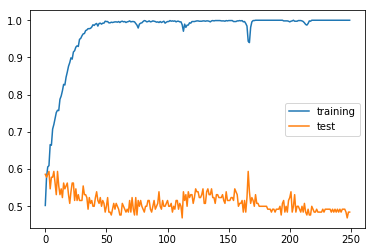

In [44]:
plt.plot(x.history['acc'],label='training')
plt.plot(x.history['val_acc'],label='test')
plt.legend()

In [6]:
#LSTM
df = pd.read_csv("df_imp")
df.head()

,date,BTC,LTC,DCOILWTICO,DCOILBRENTEU,DHHNGSP,GOLDPMGBD228NLBM,DHOILNYH,DTWEXB,DEXUSEU,...,VXOCLS,GVZCLS,VXDCLS,VXNCLS,VXSLVCLS,VXGSCLS,EVZCLS,VXFXICLS,VXEWZCLS,NIKKEI225
0,2013-04-29,144.54,4.38,94.09,102.88,4.28,1467.50,2.665,99.7738,1.3090,...,12.70,23.16,12.36,15.32,35.48,24.87,8.67,22.70,20.41,13860.86
1,2013-04-30,139.00,4.30,93.22,101.53,4.30,1469.00,2.623,99.5103,1.3168,...,12.54,22.09,12.21,15.34,34.29,24.76,8.68,21.93,20.02,13860.86
2,2013-05-01,116.99,3.80,90.74,98.34,4.31,1454.75,2.604,99.5764,1.3192,...,13.79,22.93,13.02,16.00,36.62,25.83,8.73,23.28,20.98,13799.35
3,2013-05-02,105.21,3.37,93.70,100.32,4.28,1469.25,2.718,99.7497,1.3066,...,12.89,22.06,12.25,15.19,33.73,24.43,8.75,22.66,20.74,13694.04
4,2013-05-03,97.75,3.04,95.25,104.60,3.98,1469.25,2.731,99.6402,1.3112,...,12.16,20.37,11.67,14.66,32.09,25.68,7.99,21.61,20.22,13694.04
